# Coursera - Simulation and modeling of natural processes - Agent based models

## Importing libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import random


## Defining parameters

In [2]:
V = 2*np.exp(-6)        # Initial velocity
dt = 0.2                # Time interval
L = 100*np.exp(-6)      # Domain length
P1 = 0.9                # Probability to continue in straight direction for high current concentration
P2 = 0.5                # Probability to continue in straight direction for less current concentration
N = 10                  # Number of bacteria used for simulation


## Define bacteria as class

In [3]:
class Bacteria(object):
    def __init__(self, x, y):
        self.x = x      # Position of bacteria in X
        self.y = y      # Position of bacteria in Y
        self.vx = None  # Velocity component in X -> velocity defined as V
        self.vy = None  # Velocity component in X -> velocity defined as V
        self.randomize_velocity()   # Get a random direction to move
        self.old_density = 1/float((1+math.hypot(self.x-L/float(2),self.y-L/float(2))))

    def randomize_velocity(self):
        alpha = random.random()*np.pi*2     # Generating a random direction
        self.vx = V * np.cos(alpha)         # Updating velocity components based on the random direction
        self.vy = V * np.sin(alpha)

    def movement(self):
        current_density = 1/float((1+math.hypot(self.x-L/float(2),self.y-L/float(2))))
        forward = False

        if current_density > self.old_density:
            if random.random() < P1:
                forward = True
            else:
                self.randomize_velocity()

        else:
            if random.random() < P2:
                forward = True
            else:
                self.randomize_velocity()

        self.x = self.x + dt*self.vx        # Updating the position in X
        self.y = self.y + dt * self.vy      # Updating the position in Y

        self.x %= L
        self.y %= L

        self.old_density = current_density  # Updating the density


## Creating list of bacteria

In [4]:
bac_list = [Bacteria(random.random() * L, random.random() * L) for i in range(N)]

## Plotting the bacteria movement

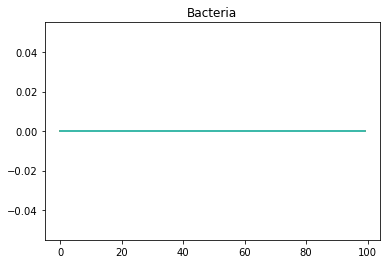

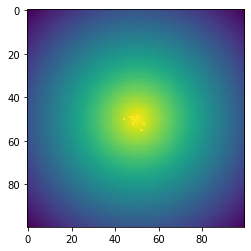

In [6]:
m = np.zeros((100, 100))
plt.figure()
line1 = plt.plot(m)
plt.title("Bacteria")
plt.ion()
plt.show()

for it in range(200):                       # Number of time steps used = 200
    if it%10 == 0:
        m = np.zeros((100, 100))
        for x in range(100):
            for y in range(100):
                m[x, y] = 1/float((1+math.hypot((x * L / float(100)) -L/float(2),(y * L / float(100))-L/float(2))))
        for bacteria in bac_list:
            x, y = int(bacteria.x * 100/L), int(bacteria.y * 100/L)
            m[x, y] = 1.0
        plt.imshow(m)  # add interpolation='None' for non-smoothed image
        # plt.savefig("bacteria" + str(it) + ".png")
        plt.gcf().canvas.draw()

    for ib in bac_list:
        ib.movement()